# Collect Data


In [1]:
import pandas as pd
import re

In [2]:
#df = pd.read_csv('/content/drive/Shareddrives/real/Big Data/data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

# for jupyter 
# df = pd.read_csv('data/big-data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

df = pd.read_csv('vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

In [3]:
df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [4]:
# clean domain names, since there are things like http://zing.news.vn/ and zing.news.vn which are the same thing
for i in range(len(df['domain'])):
  df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

In [5]:
# check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


# Visualization

In [6]:
#!pip install plotly
#!pip install cufflinks

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# run this again if iplot doesn't display

import numpy as np
import pandas as pd

# plotly packages
import plotly
#import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [9]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.barplot(x=['Giả', 'Thật'], y=label_count, palette=['r', 'b'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng nhãn')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Tổng số lượng nhãn:', len(df['label']), '\n')
print(label_count, '\n')

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
# Count of each domain names
domain_count = df.value_counts('domain')

plt.figure(figsize=(6, 10))
sns.barplot(x=domain_count, y=domain_count.index)
plt.xlabel('Số lượng tin tức lấy từ tên miền')
plt.ylabel('Tên miền')
plt.title('Biểu đồ số lượng tin tức lấy từ mỗi tên miền', y=1.01) # y = space from graph
print('Tổng số lượng các tên miền:', len(set(df['domain'])), '\n')
print(domain_count, '\n')

domain_count.iplot(
    kind='barh',
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',
    color='red')

In [ ]:
# interactive plot and colored plot

len_text = [len(t) for t in df['text']]
df['len_text'] = len_text

plt.figure(figsize=(8, 6))
sns.histplot(data=len_text, bins=50, color='r')
plt.xticks(ticks=range(0,10000,1000))
plt.title('Biểu đồ số lượng từ trong một tin tức')

df['len_text'].iplot(
    kind='hist',
    bins=50,
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng từ trong một tin tức',
    )

In [ ]:
# idea: top các bài báo có số lượng từ nhiều nhất thuộc về các domain nào
# word cloud

In [10]:
from underthesea import word_tokenize
#Tokenize, put all words in an array(can be modified for preprocessing)
T=[]
F=[]
for i in range(len(df['text'])):
    if(df['label'][i]):
        T.extend(re.findall(r'[_\w]+', word_tokenize(df['text'][i], format='text')))
    else:
        F.extend(re.findall(r'[_\w]+', word_tokenize(df['text'][i], format='text')))

In [11]:
print(T[:50])

['Thủ_tướng', 'Abe', 'cúi', 'đầu', 'xin_lỗi', 'vì', 'hành_động', 'phi', 'thể_thao', 'của', 'tuyển', 'Nhật', 'Theo', 'Sankei_Sports', 'sáng', 'nay', 'Thủ_tướng', 'Nhật_Bản_Shinzo_Abe', 'công_khai', 'gửi', 'lời', 'xin_lỗi', 'tới', 'Nhật_hoàng', 'và', 'toàn_bộ', 'người', 'dân', 'vì', 'tinh_thần', 'thi_đấu', 'phi', 'thể_thao', 'của', 'đội_tuyển', 'Nhật', 'tại', 'World_Cup', '2018', 'Tối_qua', 'sau', 'lượt', 'trận', 'cuối', 'vòng', 'bảng', 'World_Cup', '2018', 'Nhật_Bản', 'có']


In [12]:
#Stopword
stop_words=[]
with open('vietnamese-stopwords-dash.txt', encoding="utf8") as f:
    for s in f:
        s= s.split('\n')
        stop_words.append(s[0])

In [13]:
print(stop_words[:50])

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy', 'ba', 'ba_ba', 'ba_bản', 'ba_cùng', 'ba_họ', 'ba_ngày', 'ba_ngôi', 'ba_tăng', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_nả', 'bay_biến', 'biết', 'biết_bao', 'biết_bao_nhiêu', 'biết_chắc', 'biết_chừng_nào', 'biết_mình', 'biết_mấy', 'biết_thế', 'biết_trước', 'biết_việc', 'biết_đâu', 'biết_đâu_chừng', 'biết_đâu_đấy', 'biết_được', 'buổi', 'buổi_làm', 'buổi_mới', 'buổi_ngày', 'buổi_sớm', 'bà', 'bà_ấy', 'bài', 'bài_bác', 'bài_bỏ', 'bài_cái', 'bác', 'bán']


In [14]:
from wordcloud import WordCloud, ImageColorGenerator

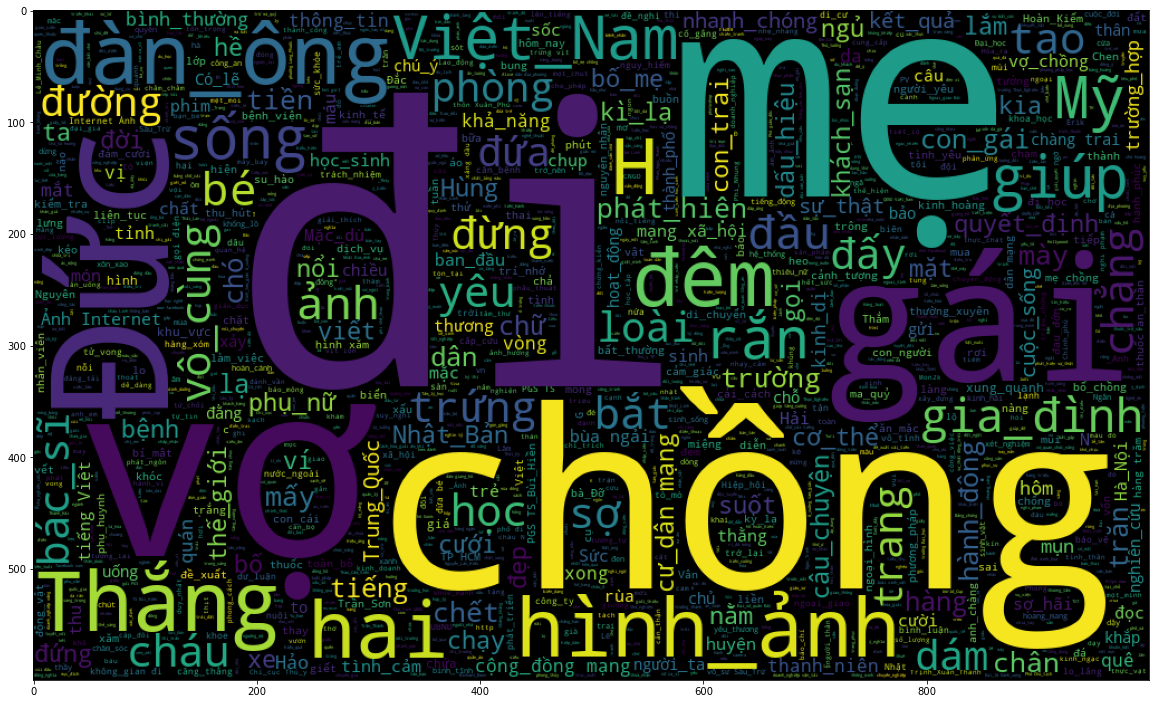

In [15]:
# True news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1000, height = 600, stopwords = stop_words).generate(" ".join(T))
plt.imshow(wc)

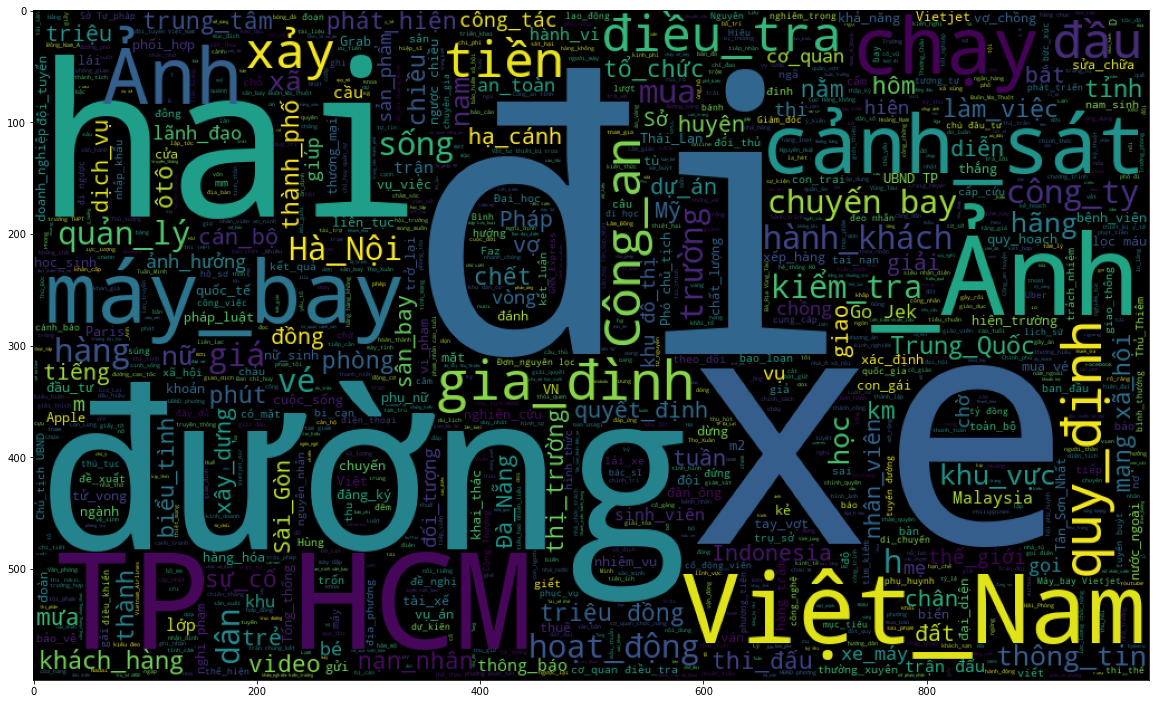

In [16]:
#Fake news
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width = 1000, height = 600, stopwords = stop_words).generate(" ".join(F))
plt.imshow(wc)

In [17]:
# sns.barplot(x=domain_count, y=domain_count.index)

NameError: name 'domain_count' is not defined

# Pre-processing

In [ ]:
'''
1. clean domain names (done)
2. classify domain names to categorical type? labelencoder or sth else
3. xử lý text
    check missing or too trash
    clean, filer (regex) on some part if needed
    tokenize, word segment, remove stopwords?, group same tokens? -> check again if too short text data remains-> remove from data?
    word embedding: word2vec...?
'''

In [ ]:
# !pip install pyvi

In [ ]:
# pyvi, fast and ez, but bad word segmentations
from pyvi import ViTokenizer
ViTokenizer.tokenize('Nguyễn Hoàng Minh đang sử dụng mạng xã hội')

In [ ]:
# !pip install vncorenlp

In [ ]:
# vncorenlp, have to connect to some sort of server with a downloaded file -> ERROR, but better than python-vncorenlp as it has seperate tokenizer and stuffs 
from vncorenlp import VnCoreNLP
annotator = VnCoreNLP('/content/drive/Shareddrives/real/Big Data/data/vncorenlp/vncorenlp-1.0.3.tar.gz', annotators='wseg,pos,ner,parse', max_heap_size='-Xmx2g') 

In [ ]:
# !pip install python-vncorenlp

In [ ]:
# vncorenlp still but sth like a python wrapper, easier to access. Doesn't have a seperate tokenizer, only annotate -> annoying preprocess, redundant and might be slow
from python_vncorenlp import install, Pipeline
install('-Xmx2g')

In [ ]:
pipeline = Pipeline()
pipeline.load_model()

In [ ]:
# work perfectly but still 
print(pipeline.annotate_doc('Nguyễn Hoàng Minh Thư đang sử dụng mạng xã hội'))
print(pipeline.annotate_doc('Mạc Thuận Đạt đang sử dụng mạng xã hội'))

In [ ]:
from underthesea import word_tokenize
print(word_tokenize('Nguyễn Hoàng Minh Thư đang sử dụng mạng xã hội', format='text'))
print(word_tokenize('Mạc Thuận Đạt đang sử dụng mạng xã hội', format='text')) # -> doesn't work with some names?

# Model

# Evaluation